In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binom
import seaborn as sns
import pandas as pd
#import pymannkendall as mk


0.634075378578 0.317037689289
0.53244561303 0.266222806515


/apps/python/3.6.1/lib/python3.6/site-packages/matplotlib-2.0.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


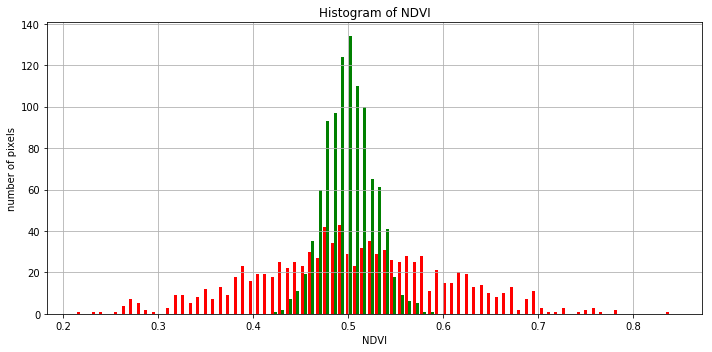

DescribeResult(nobs=1000, minmax=(0.21402207895236314, 0.84223291437053394), mean=0.50472871103012662, variance=0.0098233936441349239, skewness=0.020069070695882086, kurtosis=-0.06621328566824047)
[ 0.27405495  0.34433611  0.38113758  0.43941382  0.50059067  0.57102275
  0.63407538  0.66989318  0.73188497]
DescribeResult(nobs=1000, minmax=(0.4202436215461412, 0.5857023389446242), mean=0.50022216611367409, variance=0.00062549478880892116, skewness=0.09148428629732278, kurtosis=0.07310292905569993)
[ 0.44199895  0.45936781  0.46933353  0.48298964  0.50001532  0.51657252
  0.53244561  0.54007452  0.55991533]


In [2]:
ndvi_1 = (np.random.normal(size=1000)) * 0.1 + 0.5
ndvi_1 = np.delete(ndvi_1, np.where(ndvi_1 < 0))
ndvi_1 = np.delete(ndvi_1, np.where(ndvi_1 > 0.95))
percentile_90_1 = np.percentile(ndvi_1, 90)
print(percentile_90_1, percentile_90_1/2)
#ndvi_degraded = ndvi[np.where(ndvi < percentile_90/2)]

ndvi_2 = (np.random.normal(size=1000)) * 0.025 + 0.5
ndvi_2 = np.delete(ndvi_2, np.where(ndvi_2 < 0))
ndvi_2 = np.delete(ndvi_2, np.where(ndvi_2 > 0.95))
percentile_90_2 = np.percentile(ndvi_2, 90)
print(percentile_90_2, percentile_90_2/2)
#ndvi_degraded = ndvi[np.where(ndvi < percentile_90/2)]

fig, ax = plt.subplots(tight_layout=True, figsize=(10,5))
nbins=80
ax.hist(np.column_stack([ndvi_1,ndvi_2]), nbins,  color=['r','g'], histtype='bar')

ax.set_xlabel('NDVI')
ax.set_ylabel('number of pixels')
ax.set_title('Histogram of NDVI')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
ax.grid(True)
plt.show()

print(scipy.stats.describe(ndvi_1))
print(np.percentile(ndvi_1, [1,5,10,25,50,75,90,95,99]))

print(scipy.stats.describe(ndvi_2))
print(np.percentile(ndvi_2, [1,5,10,25,50,75,90,95,99]))

## analysis of trend and state


ndvi 2000-2009 sorted
2006-12-31    0.263648
2008-12-31    0.317033
2002-12-31    0.378023
2001-12-31    0.406297
2000-12-31    0.455960
2004-12-31    0.456010
2005-12-31    0.493846
2007-12-31    0.524008
2009-12-31    0.557861
2003-12-31    0.661669
Name: ndvi, dtype: float64
2010-2012 mean ndvi, rank:  0.5342342443318446 80.0
2018-2020 mean ndvi, rank:  0.5713031187847109 90.0
difference rank:  10.0


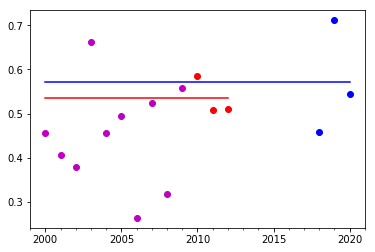

In [76]:
origin = 0 
slope = 0
rand_mu = 0.5
rand_sigma=0.1

df = pd.DataFrame()
df['year']= np.arange(2000, 2021)
df.index= pd.date_range(start='2000', end='2021', freq='1Y')
df['ndvi'] = origin + slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  
df.loc['2000':'2012']

print('ndvi 2000-2009 sorted')
print(df.loc['2000':'2009', 'ndvi'].sort_values())

mean_10_12 = df.loc['2010':'2012', 'ndvi'].mean()
rank_10_12 = scipy.stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_10_12)
mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
rank_18_20 = scipy.stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_18_20)
print('2010-2012 mean ndvi, rank: ', mean_10_12, rank_10_12)
print('2018-2020 mean ndvi, rank: ', mean_18_20, rank_18_20)
print('difference rank: ', rank_18_20 - rank_10_12)

fig, ax = plt.subplots()
df.loc['2000':'2009'].plot(y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax)
df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
df.loc['2018':'2020'].plot(y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax)
ax.set_xlim(['1999','2021'])
#ax.set_ylim([0,0.8])
ax.plot(['2000','2012'],[mean_10_12,mean_10_12], color= 'r')
ax.plot(['2000','2020'],[mean_18_20,mean_18_20], color= 'b')
#df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
ax.legend().set_visible(False)
plt.show()


/apps/python/3.6.1/lib/python3.6/site-packages/matplotlib-2.0.2-py3.6-linux-x86_64.egg/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


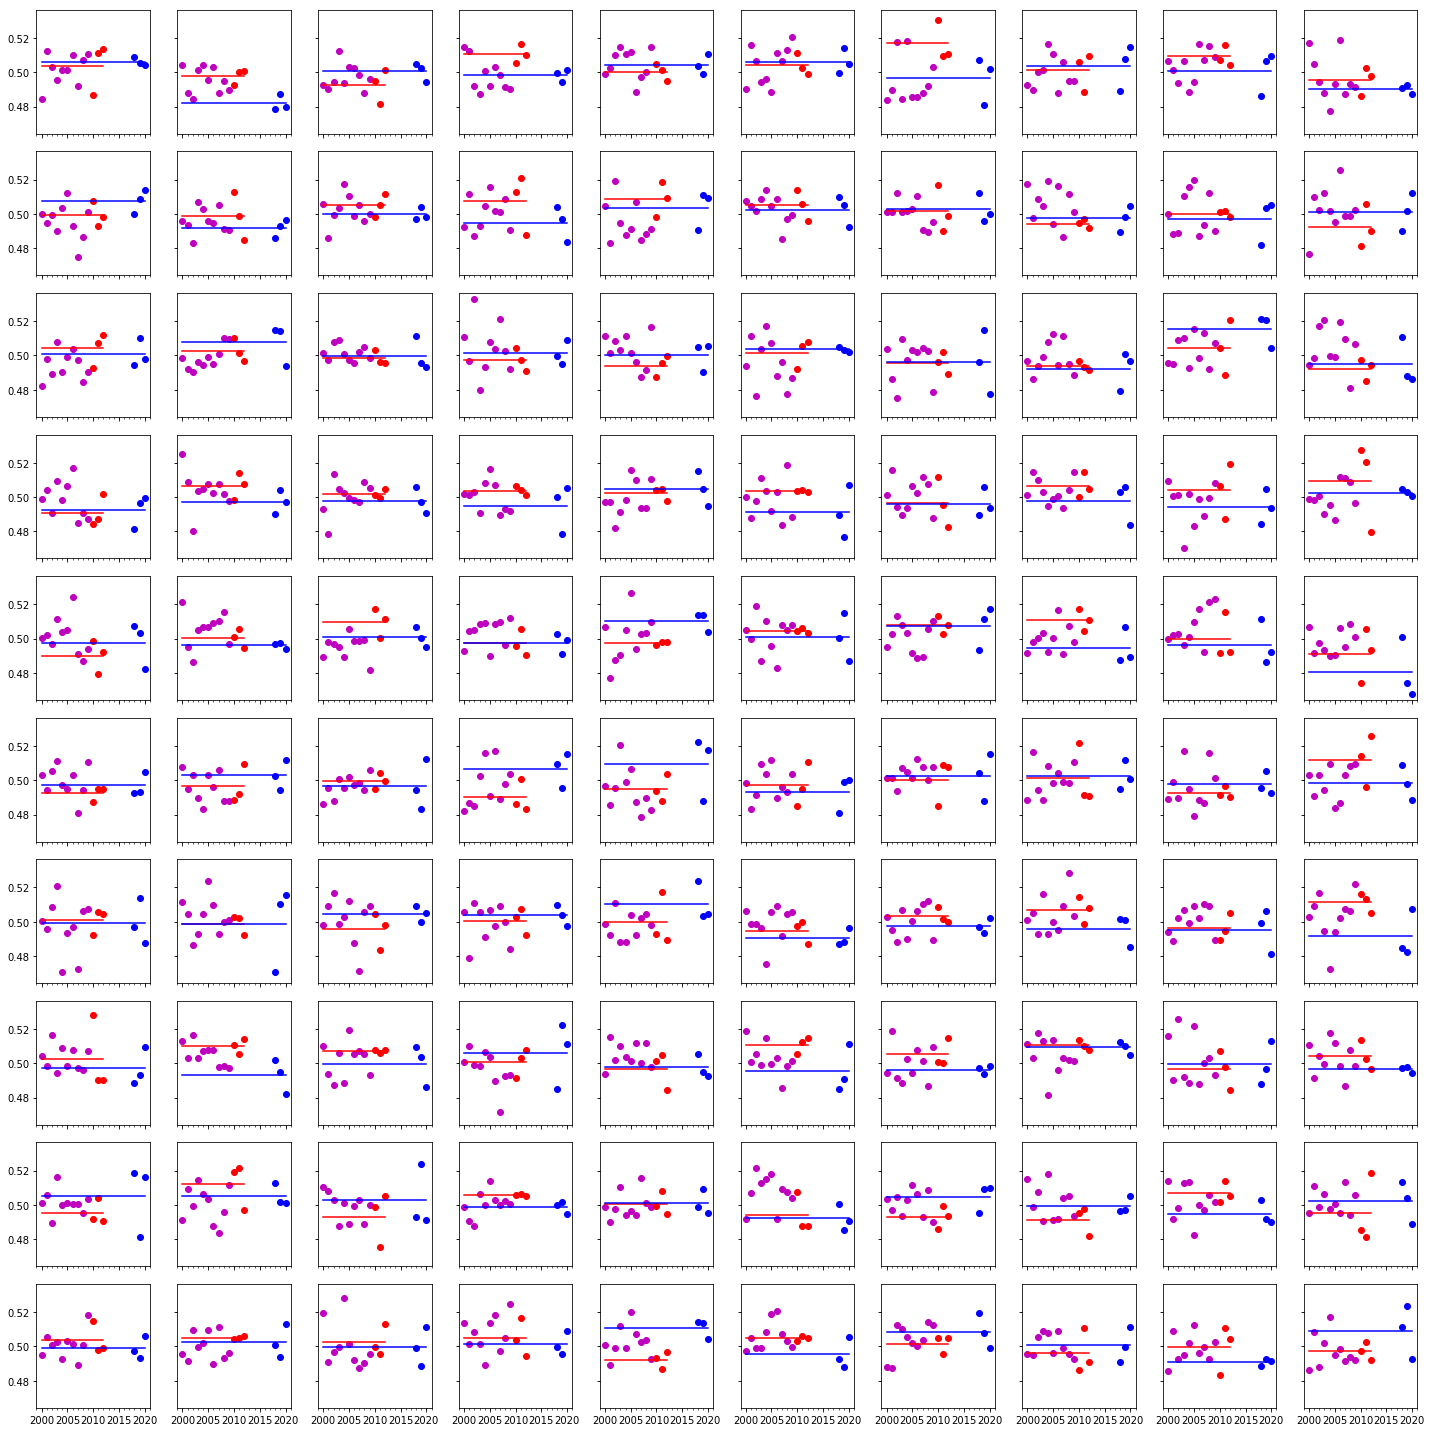

,origin,slope,rand,mean_10_12,mean_18_20,rank_10_12,rank_18_20,rank_diff
0,0.0,0.0,0.2,0.503921,0.506316,60.0,60.0,0.0
0,0.0,0.0,0.2,0.497661,0.482020,60.0,0.0,-60.0
0,0.0,0.0,0.2,0.492566,0.500652,20.0,70.0,50.0
0,0.0,0.0,0.2,0.510847,0.498415,80.0,60.0,-20.0
0,0.0,0.0,0.2,0.500461,0.504353,40.0,50.0,10.0
0,0.0,0.0,0.2,0.504360,0.506247,40.0,40.0,0.0
0,0.0,0.0,0.2,0.517011,0.496793,80.0,70.0,-10.0
0,0.0,0.0,0.2,0.501425,0.503815,70.0,70.0,0.0
0,0.0,0.0,0.2,0.509289,0.500818,80.0,30.0,-50.0
0,0.0,0.0,0.2,0.495626,0.490527,70.0,30.0,-40.0


In [71]:
results = pd.DataFrame()

origin = 0 
slope = 0
rand_mu = 0.5
rand_sigma=0.01

fig, ax = plt.subplots(10,10,sharex=True, sharey=True, figsize=(20 ,20), tight_layout=True)
ax_x = 0
ax_y = 0

for i in range(100):
    df = pd.DataFrame()
    df['year']= np.arange(2000, 2021)
    df.index= pd.date_range(start='2000', end='2021', freq='1Y')
    df['ndvi'] = origin + slope * (df['year']-2000) + np.random.normal(rand_mu, rand_sigma, 21)  

    #print('ndvi 2000-2009 sorted', df.loc['2000':'2009', 'ndvi'].sort_values())

    mean_10_12 = df.loc['2010':'2012', 'ndvi'].mean()
    rank_10_12 = scipy.stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_10_12)
    mean_18_20 = df.loc['2018':'2020', 'ndvi'].mean()
    rank_18_20 = scipy.stats.percentileofscore(df.loc['2000':'2009', 'ndvi'], mean_18_20)
    rank_diff = rank_18_20 - rank_10_12

    df_result = pd.DataFrame(np.array([[origin,slope,rand,mean_10_12,mean_18_20,rank_10_12,rank_18_20,rank_diff]]), 
                      columns=['origin','slope','rand','mean_10_12','mean_18_20','rank_10_12','rank_18_20','rank_diff'])
    results=results.append(df_result)
    
    df.loc['2000':'2009'].plot(y='ndvi', marker='o', color='m', linestyle='None', zorder=1, ax=ax[ax_x,ax_y])
    df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
    df.loc['2018':'2020'].plot(y='ndvi', marker='o', color='b', linestyle='None', zorder=2, ax=ax[ax_x,ax_y])
    ax[ax_x,ax_y].set_xlim(['1999','2021'])
    #ax[ax_x,ax_y].set_ylim([0,1])
    ax[ax_x,ax_y].plot(['2000','2012'],[mean_10_12,mean_10_12], color= 'r')
    ax[ax_x,ax_y].plot(['2000','2020'],[mean_18_20,mean_18_20], color= 'b')
    #df.loc['2010':'2012'].plot(y='ndvi', marker='o', color='r', linestyle='None', zorder=2, ax=ax)
    ax[ax_x,ax_y].legend().set_visible(False)

    if ax_y == 9:
        ax_y=0
        ax_x=ax_x+1
    else:
        ax_y=ax_y+1        

    
plt.show()
results

45  simulations had positive or negative change (abs value more than 20)


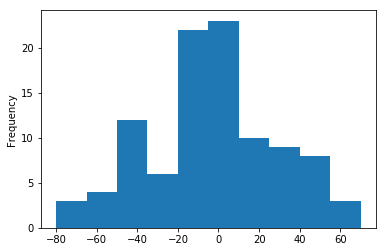

In [72]:
print(results.loc[results['rank_diff'].abs() > 20, 'rank_diff'].count(), ' simulations had positive or negative change (abs value more than 20)')
results['rank_diff'].plot.hist()
plt.show()